In [61]:
import numpy as np
import pandas as pd

In [62]:
food_df = pd.read_csv('./datasets/preprocessed_food.csv')
recommended_df = pd.read_csv('./datasets/preprocessed_recommendedfordisease.csv')

In [63]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor
from sklearn.svm import SVR


In [64]:
nutritional_cols = ['Energy (kcal)', 'Protein (mg)', 'Carbohydrate (mg)', 'Sugars, total(mg)',
                    'Fiber, total dietary (mg)', 'Total Fat (mg)', 'Fatty acids, total saturated (mg)',
                    'Cholesterol (mg)', 'Niacin (mg)', 'Folic acid ((mg))', 'Choline, total (mg)',
                    'Vitamin C (mg)', 'Vitamin E (alpha-tocopherol) (mg)', 'Calcium (mg)',
                    'Phosphorus (mg)', 'Magnesium (mg)', 'Potassium (mg)', 'Sodium (mg)',
                    'Caffeine (mg)', 'Theobromine (mg)', 'Alcohol (mg)', 'Water(mg)']


In [65]:
disease_limits = recommended_df[nutritional_cols].values

len(disease_limits)

20

In [66]:
# Extract nutrient columns
nutrient_columns = food_df.columns[2:]
food_nutrition = food_df[nutrient_columns].values

len(nutrient_columns),len(food_nutrition)

(22, 6529)

In [67]:
scaler = StandardScaler()
food_nutrition_scaled = scaler.fit_transform(food_nutrition)
disease_limits_scaled = scaler.transform(disease_limits)

len(food_nutrition_scaled),len(disease_limits_scaled)

(6529, 20)

In [68]:
food_nutrition_scaled[0], disease_limits_scaled[0]

(array([-0.96783211, -0.95752708, -0.65907926, -0.03641579, -0.66823404,
        -0.45019565, -0.22359415, -0.28418779, -0.63554542, -0.23183929,
        -0.44898583,  0.00181913, -0.31946786, -0.37141547, -0.98116147,
        -0.65997442, -0.81743153, -0.9859367 , -0.03487977, -0.13055734,
        -0.10191342,  1.10211694]),
 array([-0.9450288 , -0.6592671 , -0.45522729, -0.01081857,  0.03955752,
        -0.66030674, -0.55804227, -0.34230679, -0.43200947, -0.22613381,
        -0.40496891,  0.44405975, -0.09793344, -0.36076346, -0.66873448,
        -0.16728502,  0.05812239, -0.70030712, -0.03487977, -0.13055734,
        -0.10191342,  0.90247398]))

In [74]:
import numpy as np
import pandas as pd
food_df = pd.read_csv('./datasets/preprocessed_food.csv')
recommended_df = pd.read_csv('./datasets/preprocessed_recommendedfordisease.csv')
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor
from sklearn.svm import SVR

nutritional_cols = ['Energy (kcal)', 'Protein (mg)', 'Carbohydrate (mg)', 'Sugars, total(mg)',
                    'Fiber, total dietary (mg)', 'Total Fat (mg)', 'Fatty acids, total saturated (mg)',
                    'Cholesterol (mg)', 'Niacin (mg)', 'Folic acid ((mg))', 'Choline, total (mg)',
                    'Vitamin C (mg)', 'Vitamin E (alpha-tocopherol) (mg)', 'Calcium (mg)',
                    'Phosphorus (mg)', 'Magnesium (mg)', 'Potassium (mg)', 'Sodium (mg)',
                    'Caffeine (mg)', 'Theobromine (mg)', 'Alcohol (mg)', 'Water(mg)']
disease_limits = recommended_df[nutritional_cols].values

len(disease_limits)
# Extract nutrient columns
nutrient_columns = food_df.columns[2:]
food_nutrition = food_df[nutrient_columns].values
scaler = StandardScaler()
food_nutrition_scaled = scaler.fit_transform(food_nutrition)
disease_limits_scaled = scaler.transform(disease_limits)
food_nutrition_scaled[0], disease_limits_scaled[0]
lin_r2_dict = {}
rid_r2_dict = {}
knn_r2_dict = {}
rand_r2_dict = {}
lin_mae_dict = {}
rid_mae_dict = {}
knn_mae_dict = {}
rand_mae_dict = {}
for i in range(20):
    distance = food_nutrition_scaled - disease_limits_scaled[i]
    distance_magnitude = np.linalg.norm(distance, axis=1)

    from sklearn.model_selection import train_test_split

    X = food_nutrition_scaled
    y = distance_magnitude

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    # Create a LinearRegression model
    model = LinearRegression()

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model performance
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    lin_r2_dict[f"key_{i}"] =r2
    lin_mae_dict[f"key_{i}"] =mae

   

    # Create a Ridge regression model
    model = Ridge(alpha=10)

    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model performance
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    rid_r2_dict[f"key_{i}"] =r2
    rid_mae_dict[f"key_{i}"] =mae

    # Create a KNN regression model
    model = KNeighborsRegressor(n_neighbors=3)

    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model performance
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    knn_r2_dict[f"key_{i}"] =r2
    knn_mae_dict[f"key_{i}"] =mae
    

    model = RandomForestRegressor(n_estimators=100,
                                random_state=3,
                                max_samples=0.5,
                                max_features=0.75,
                                max_depth=15)

    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model performance
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rand_r2_dict[f"key_{i}"] =r2
    rand_mae_dict[f"key_{i}"] =mae
    



In [80]:
knn_r2_dict


{'key_0': 0.9046836713399292,
 'key_1': 0.8929485442050058,
 'key_2': 0.9059786700969351,
 'key_3': 0.9060769748103945,
 'key_4': 0.9085129333976063,
 'key_5': 0.9027417066626119,
 'key_6': 0.9046836713399292,
 'key_7': 0.9041399595811642,
 'key_8': 0.9054277884863529,
 'key_9': 0.8915166771453916,
 'key_10': 0.8329902142997343,
 'key_11': 0.90584859805534,
 'key_12': 0.8642454492731408,
 'key_13': 0.8871203506246408,
 'key_14': 0.9073938516993438,
 'key_15': 0.9051595832042942,
 'key_16': 0.913579950586043,
 'key_17': 0.9022280268410066,
 'key_18': 0.8818649933795834,
 'key_19': 0.9025784055207448}

In [82]:
disease_df = pd.DataFrame({'Disease': ["AcidReflux", "Anemia", "Cavities", "FattyLiver", "Gastritis",
                                       "Obesity", "Pancreatitis", "Type1Diabetes", "Urinary-tract",
                                       "Hypertension", "Low Blood Pressure", "Kidney Stone",
                                       "coronary artery disease", "bronchitis", "asthma",
                                       "common cold", "influenza", "corona virus", "diarrhoea", "cholera"]})

#Dictionary with disease names as keys and indices values
disease_dict = {disease: i for i, disease in enumerate(disease_df["Disease"])}
disease_dict

{'AcidReflux': 0,
 'Anemia': 1,
 'Cavities': 2,
 'FattyLiver': 3,
 'Gastritis': 4,
 'Obesity': 5,
 'Pancreatitis': 6,
 'Type1Diabetes': 7,
 'Urinary-tract': 8,
 'Hypertension': 9,
 'Low Blood Pressure': 10,
 'Kidney Stone': 11,
 'coronary artery disease': 12,
 'bronchitis': 13,
 'asthma': 14,
 'common cold': 15,
 'influenza': 16,
 'corona virus': 17,
 'diarrhoea': 18,
 'cholera': 19}

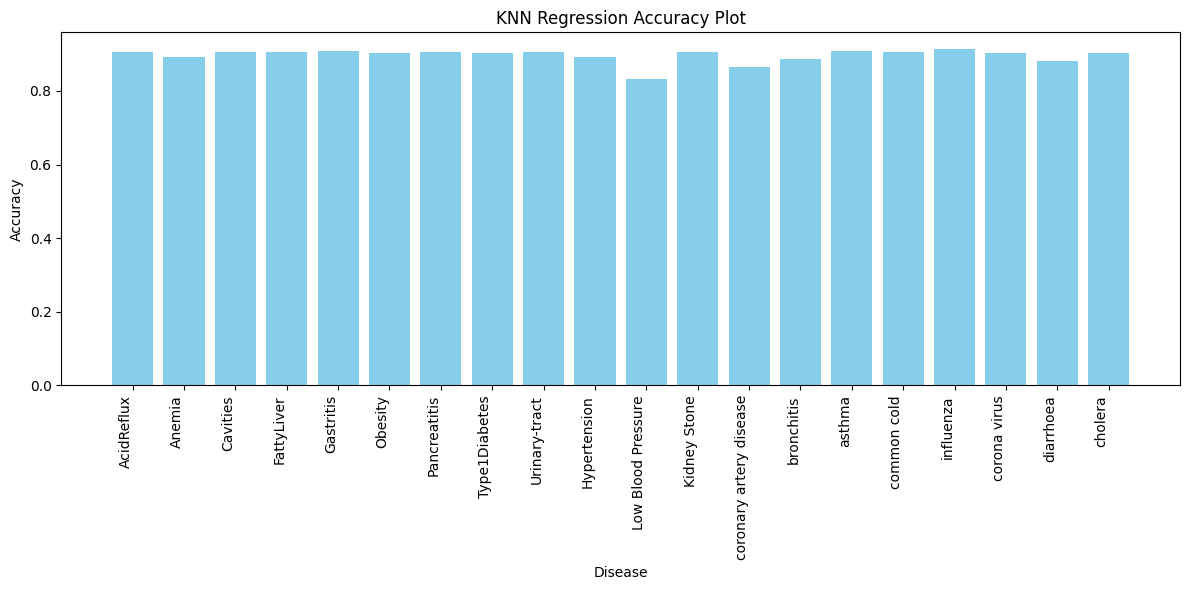

In [96]:

import matplotlib.pyplot as plt
# Extract keys and values from the dictionary
keys = list(disease_dict.keys())
values = list(knn_r2_dict.values())


# Plotting
plt.figure(figsize=(12, 6))
plt.bar(keys, values, color='skyblue')
plt.xlabel('Disease')
plt.ylabel('Accuracy')
plt.title('KNN Regression Accuracy Plot')
plt.xticks(rotation=90, ha='right')  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.show()

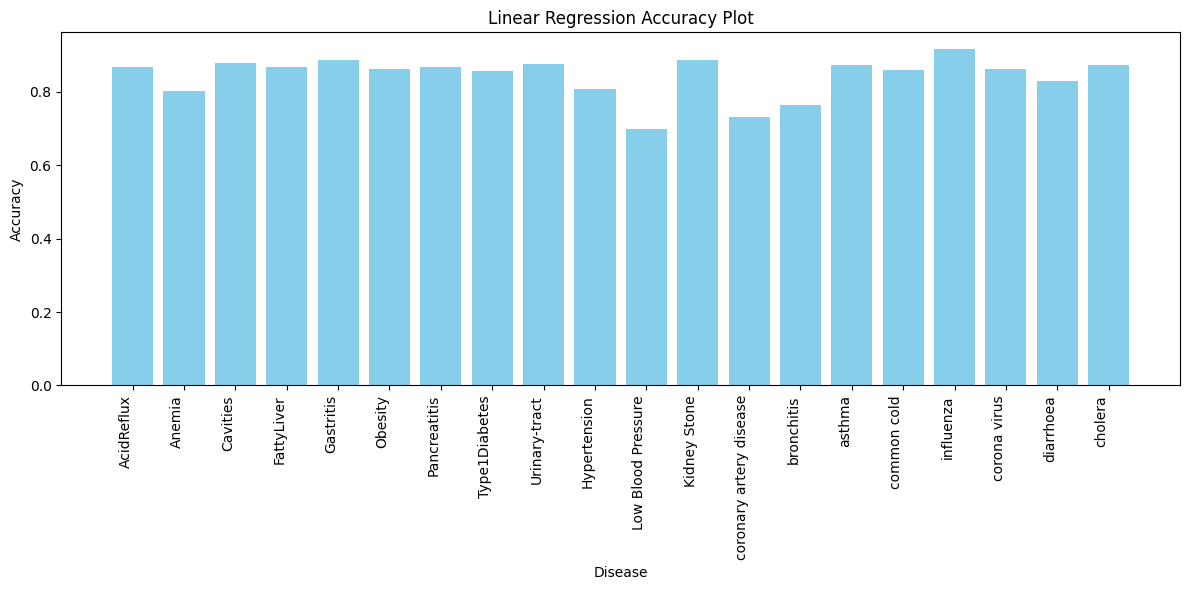

In [95]:
import matplotlib.pyplot as plt
# Extract keys and values from the dictionary
keys = list(disease_dict.keys())
values = list(lin_r2_dict.values())


# Plotting
plt.figure(figsize=(12, 6))
plt.bar(keys, values, color='skyblue')
plt.xlabel('Disease')
plt.ylabel('Accuracy')
plt.title('Linear Regression Accuracy Plot')
plt.xticks(rotation=90, ha='right')  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.show()

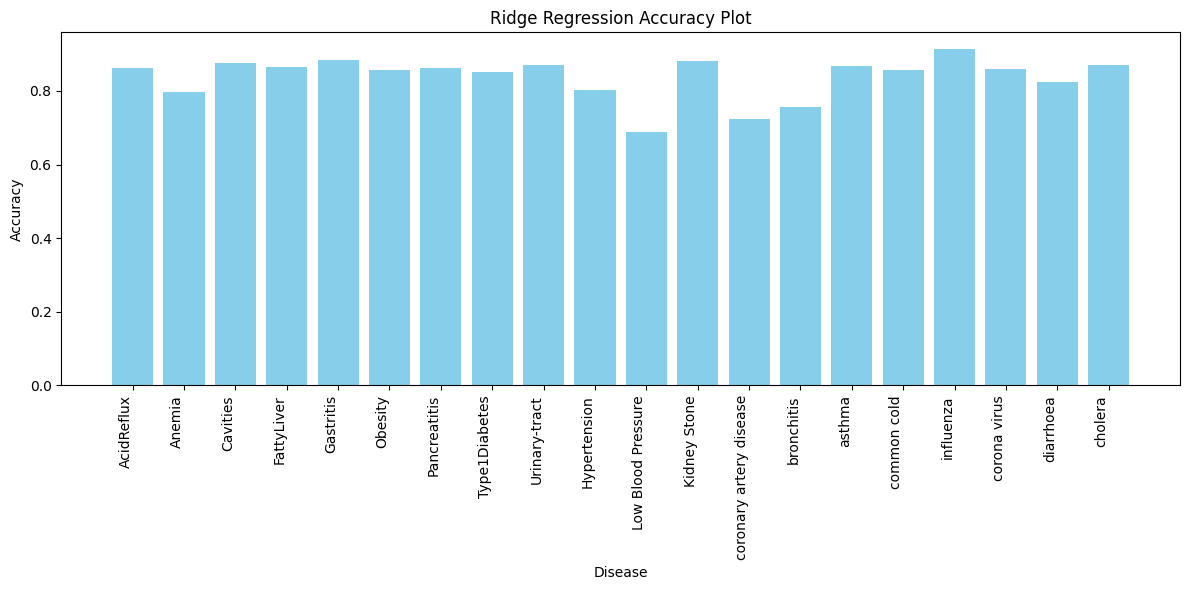

In [94]:
import matplotlib.pyplot as plt
# Extract keys and values from the dictionary
keys = list(disease_dict.keys())
values = list(rid_r2_dict.values())


# Plotting
plt.figure(figsize=(12, 6))
plt.bar(keys, values, color='skyblue')
plt.xlabel('Disease')
plt.ylabel('Accuracy')
plt.title('Ridge Regression Accuracy Plot')
plt.xticks(rotation=90, ha='right')  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.show()

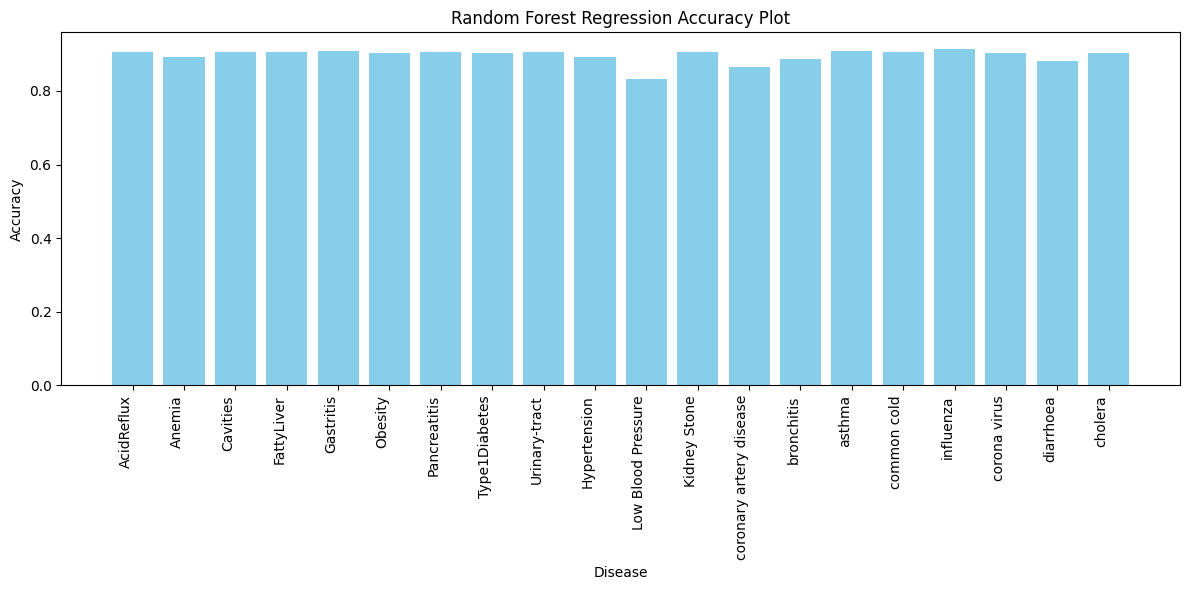

In [97]:
import matplotlib.pyplot as plt
# Extract keys and values from the dictionary
keys = list(disease_dict.keys())
values = list(knn_r2_dict.values())


# Plotting
plt.figure(figsize=(12, 6))
plt.bar(keys, values, color='skyblue')
plt.xlabel('Disease')
plt.ylabel('Accuracy')
plt.title('Random Forest Regression Accuracy Plot')
plt.xticks(rotation=90, ha='right')  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.show()

In [9]:
# distances_list = []

# for dist in range(iteration):
#     distance = food_nutrition_scaled - disease_limits_scaled[dist]
#     distances_list.append(distance)

# distances_list[]

In [10]:
# # Convert the list of distances to a NumPy array
# distances_array = np.stack(distances_list)

# # distances_array now contains all the calculated distances
# print("Shape of distances array:", distances_array.shape)

In [69]:
# Calculate distances
distance = food_nutrition_scaled - disease_limits_scaled[0]
distance_magnitude = np.linalg.norm(distance, axis=1)

In [70]:
distance[0], len(distance), len(distance_magnitude)

(array([-0.0228033 , -0.29825999, -0.20385197, -0.02559722, -0.70779156,
         0.2101111 ,  0.33444812,  0.05811899, -0.20353596, -0.00570549,
        -0.04401691, -0.44224063, -0.22153442, -0.01065201, -0.31242699,
        -0.49268939, -0.87555392, -0.28562958,  0.        ,  0.        ,
         0.        ,  0.19964295]),
 6529,
 6529)

In [55]:
from sklearn.model_selection import train_test_split

X = food_nutrition_scaled
y = distance_magnitude

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
X_train, y_train

(array([[ 0.64629198,  1.06364141, -0.12927361, ..., -0.13055734,
         -0.10191342, -0.48959935],
        [ 1.09426475, -1.08078366,  3.39734406, ..., -0.13055734,
         -0.10191342, -2.08131563],
        [ 1.27203172, -0.68349062,  3.12137539, ..., -0.13055734,
         -0.10191342, -2.08506526],
        ...,
        [-0.97494278, -0.75529057, -0.68663096, ..., -0.13055734,
         -0.10191342,  1.04099803],
        [ 0.14854447, -0.51117075, -0.71463433, ..., -0.13055734,
         -0.10191342,  0.35706623],
        [ 0.46141433,  1.21920796, -0.19115202, ..., -0.13055734,
         -0.10191342, -0.42998029]]),
 array([ 4.06464712,  7.27081373, 10.88747061, ...,  1.10818852,
         2.40780682,  4.51480129]))

In [57]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((5223, 22), (5223,), (1306, 22), (1306,))

In [47]:
food_array = np.arange(food_df.shape[1])
print('Array index of food_df\n',food_array)

# Remove 0 and 1 from the array
food_final = np.delete(food_array, [0, 1])
print('Array index of food_df after exluding 0 and 1\n',food_final)

Array index of food_df
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Array index of food_df after exluding 0 and 1
 [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [48]:
len(food_final)

22

In [18]:
transformers = [
    ('col_tnf', OneHotEncoder(
        sparse_output=False, drop='first'), food_final),
]

## Linear Regression

Note:
MAE is useful when the goal is to minimize the overall error in the model while avoiding large errors. 4. R-squared (R2): This metric measures the proportion of variance in the target variable explained by the model. It ranges from 0 to 1, with higher values indicating better performance.

In [49]:
# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.877691874070194
Mean Absolute Error: 0.7222090220162213


## Ridge Regression

In [50]:
# Create a Ridge regression model
model = Ridge(alpha=10)

model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.8745891629268543
Mean Absolute Error: 0.7233356382028061


In [51]:
# Create a KNN regression model
model = KNeighborsRegressor(n_neighbors=3)

model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.9059786700969351
Mean Absolute Error: 0.260564358570005


In [52]:
model = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.8354281439057737
Mean Absolute Error: 0.314643078546993
